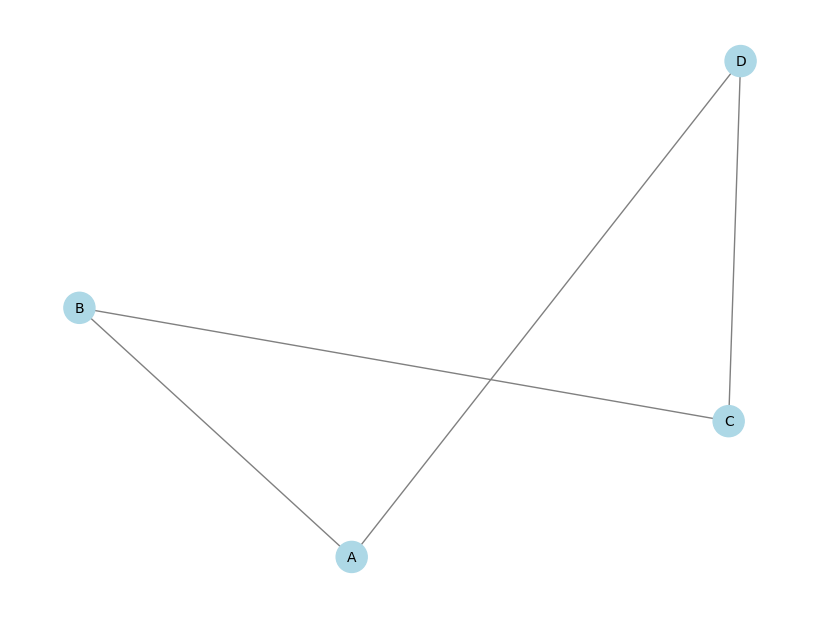

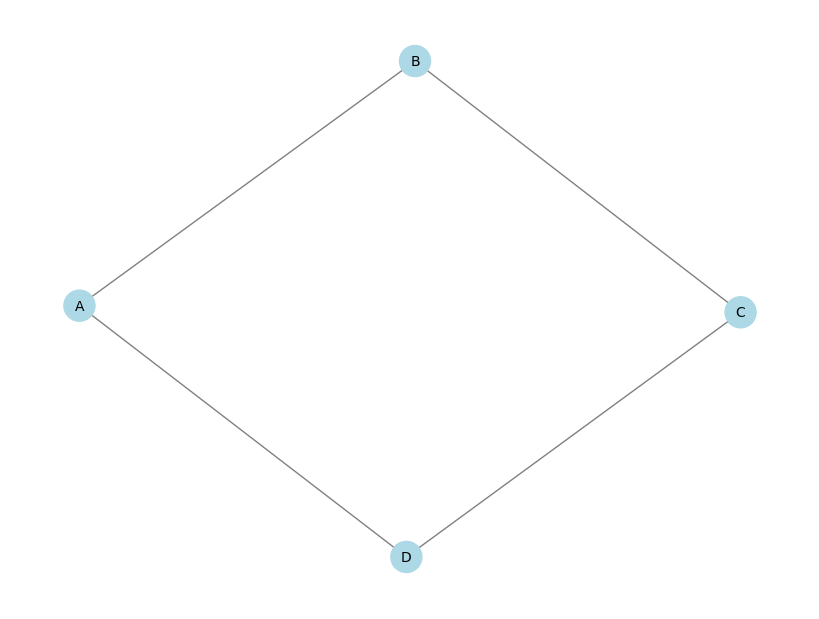

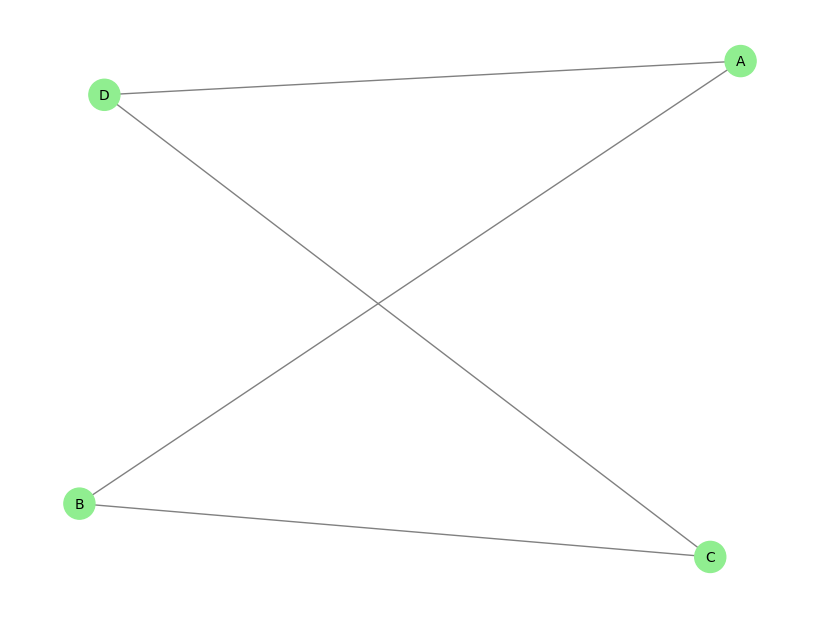

In [26]:
import itertools
import timeit
import tkinter as tk
from tkinter import messagebox
from itertools import combinations
import matplotlib.pyplot as plt
import networkx as nx
# Todas las combinaciones
def permutarValores(numeros):
    # Eliminar duplicados
    numeros_unicos = list(set(numeros))
    combinaciones = []
    for i in range(len(numeros_unicos)):
        for j in range(i + 1, len(numeros_unicos)):
            combinaciones.append((numeros_unicos[i], numeros_unicos[j]))
    return combinaciones
# Todas las combinaciones usando itertools
def permutarIterTools(numeros):
    combinaciones = list(itertools.combinations(numeros, 2))
    return combinaciones


# Tiempo permutacion
def tiempoEjecucionPermutacion(numeros):
    def wrapper():
        return permutarValores(numeros)
    tiempo_ejecucion = timeit.timeit(wrapper, number=1000)
    combinaciones = permutarValores(numeros)
    return combinaciones, len(combinaciones), tiempo_ejecucion



# Tiempo itertools
def TiempoEjecucionIterTools(numeros):
    def wrapper():
        return permutarIterTools(numeros)
    tiempo_ejecucion = timeit.timeit(wrapper, number=1000)
    combinaciones = permutarIterTools(numeros)
    return combinaciones, len(combinaciones), tiempo_ejecucion

def verificar_secuencias(sec_inicial, sec_objetivo):
    # Verificar que ambas secuencias tengan como máximo 6 elementos
    if len(sec_inicial) > 6 or len(sec_objetivo) > 6:
        return "Las secuencias deben tener como máximo 6 elementos."
    
    # Verificar que las secuencias tengan la misma cantidad de elementos
    if len(sec_inicial) != len(sec_objetivo):
        return "Las secuencias deben tener la misma cantidad de elementos."
    
    # Verificar que ambas secuencias contengan los mismos números sin importar los signos
    if sorted(abs(x) for x in sec_inicial) != sorted(abs(x) for x in sec_objetivo):
        return "Las secuencias no contienen los mismos números (sin importar los signos)."
    
    return "Las secuencias son válidas."











def permutar_y_cambiar_signo(secuencia, inicio, fin):
    # Intercambiar el grupo de números y cambiar sus signos
    grupo = secuencia[inicio:fin+1]
    grupo = [-x for x in reversed(grupo)]  # Invertir y cambiar signos
    secuencia[inicio:fin+1] = grupo
    return secuencia

def buscar_secuencia_objetivo(secuencia_inicial, secuencia_objetivo):
    # Validar las secuencias
    validacion = verificar_secuencias(secuencia_inicial, secuencia_objetivo)
    pasos = []
    secuencia_actual = secuencia_inicial.copy()
    contador_pasos = 0
    
    while secuencia_actual != secuencia_objetivo:
        if contador_pasos >= 20:
            print("No se pudo alcanzar la secuencia objetivo en menos de 20 pasos.")
            return pasos, secuencia_actual
        
        # Recorrer la secuencia
        for i in range(len(secuencia_inicial)):
            # Si el número actual no coincide con el objetivo
            if secuencia_actual[i] != secuencia_objetivo[i]:
                # Buscar grupo contiguo de números que necesitan ser permutados
                inicio = i
                fin = i
                for j in range(i + 1, len(secuencia_actual)):
                    if secuencia_actual[j] != secuencia_objetivo[j]:
                        # Verificar que no haya números correctos entre medio
                        todos_incorrectos = True
                        for k in range(inicio, j):
                            if secuencia_actual[k] == secuencia_objetivo[k]:
                                todos_incorrectos = False
                                break
                        if todos_incorrectos:
                            fin = j
                        else:
                            break
                
                # Realizar la permutación del grupo
                if inicio != fin:
                    secuencia_actual = permutar_y_cambiar_signo(secuencia_actual, inicio, fin)
                    pasos.append(secuencia_actual.copy())
                    contador_pasos += 1
                    break
                
                # Si no se puede permutar un grupo, intentar permutar solo un número
                for j in range(i + 1, len(secuencia_actual)):
                    if abs(secuencia_actual[j]) == abs(secuencia_objetivo[i]):
                        secuencia_actual = permutar_y_cambiar_signo(secuencia_actual, i, j)
                        pasos.append(secuencia_actual.copy())
                        contador_pasos += 1
                        break
            if secuencia_actual == secuencia_objetivo:
                break
    
    return pasos, secuencia_actual


def permutar_segmento(secuencia, inicio, fin):

    segmento = secuencia[inicio:fin + 1]
    # Invertir y cambiar el signo de los elementos
    segmento_permutado = [-x for x in reversed(segmento)]
    return secuencia[:inicio] + segmento_permutado + secuencia[fin + 1:]

def obtener_permutaciones_para_llegar_a_objetivo(sec_inicial, sec_objetivo):

    # Validar las secuencias
    validacion = verificar_secuencias(sec_inicial, sec_objetivo)
    if validacion != "Las secuencias son válidas.":
        return validacion
    
    # Almacenar los pasos
    pasos = []
    sec_actual = sec_inicial[:]
    pasos.append(f"Secuencia inicial: {sec_inicial}")
    
    # Intentar alcanzar la secuencia objetivo con permutaciones
    paso = 1
    while sec_actual != sec_objetivo:
        permutacion_realizada = False
        # Intentar permutar los segmentos de la secuencia
        for i in range(len(sec_actual)):
            for j in range(i + 1, len(sec_actual)):
                # Verificar que los números sean diferentes antes de permutar
                if sec_actual[i] != sec_actual[j]:
                    # Probar permutar el segmento desde i hasta j
                    sec_actual = permutar_segmento(sec_actual, i, j)
                    pasos.append(f"Secuencia después de la permutación {paso}: {sec_actual}")
                    paso += 1
                    # Verificar si alcanzamos la secuencia objetivo
                    if sec_actual == sec_objetivo:
                        pasos.append(f"Secuencia objetivo alcanzada: {sec_objetivo}")
                        break
            if sec_actual == sec_objetivo:
                break
        # Si no se pudo realizar ninguna permutación válida, terminamos
        if not permutacion_realizada:
            pasos.append("No se pudo realizar una permutación válida.")
            break
    
    return "\n".join(pasos)

def is_vertex_cover(graph, subset):
  for u, v in graph.edges():
    if u not in subset and v not in subset:
      return False
  return True

def brute_force_vertex_cover(graph):
  nodes = list(graph.nodes())
  for k in range(1, len(nodes) + 1):
    for subset in combinations(nodes, k):
        if is_vertex_cover(graph, subset):
          return subset
  return None

def greedy_vertex_cover(graph):
  cover = set()
  edges = set(graph.edges())
  while edges:

# Find the vertex with the maximum degree
    degrees = {node: len(list(graph.neighbors(node))) for node in graph.nodes}
    max_degree_node = max(degrees, key=degrees.get)

# Add the node to the cover and remove its edges
    cover.add(max_degree_node)
    for neighbor in list(graph.neighbors(max_degree_node)):
      edges.discard((max_degree_node, neighbor))
      edges.discard((neighbor, max_degree_node))
      graph.remove_node(max_degree_node)
      return cover

def find_greedy_vertex_cover():
    graph = generate_graph()
    vertex_cover = greedy_vertex_cover_highlight(graph)
    result_text.set(f"Greedy Vertex Cover: {vertex_cover}")
    find_vertex_cover_greedy()
    draw_graph(graph, vertex_cover)

def greedy_vertex_cover_highlight(graph):
    temp_graph = graph.copy()
    cover = greedy_vertex_cover(temp_graph)
    return cover 

def approximation_vertex_cover_highlight(graph):
    temp_graph = graph.copy()
    cover = vertex_cover_approximation(temp_graph)
    return cover

def draw_graph(graph, vertex_cover=None):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(graph)
    if vertex_cover is None:
        vertex_cover = []
    node_colors = ['lightblue' if node not in vertex_cover else 'lightgreen' for node in graph.nodes()]
    nx.draw(graph, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=500, font_size=10)
    plt.show()

def generate_graph():
    nodes = entry_nodes.get().split(',')
    edges = entry_edges.get().split(';')
    graph = nx.Graph()
    graph.add_nodes_from(nodes)
    for edge in edges:
        u, v = edge.split(',')
        graph.add_edge(u.strip(), v.strip())
    draw_graph(graph)
    return graph

def find_vertex_cover():
    graph = generate_graph()
    vertex_cover = brute_force_vertex_cover(graph)
    result_text.set(f"Vertex Cover: {vertex_cover}")
    draw_graph(graph, vertex_cover)

def find_vertex_cover_greedy():
    graph = generate_graph()
    vertex_cover = greedy_vertex_cover(graph)
    result_text.set(f"Vertex Cover: {vertex_cover}")
    draw_graph(graph, vertex_cover)

def vertex_cover_approximation(G):
    cover = set()
    edges = set(G.edges())
    while edges:
        u, v = edges.pop()  # Pick an arbitrary edge
        cover.add(u)
        cover.add(v)
        edges = edges - set(G.edges(u)) - set(G.edges(v))  # Remove covered edges
    return cover

def find_vertex_cover_approximation():
    graph = generate_graph()
    vertex_cover = approximation_vertex_cover_highlight(graph)
    result_text.set(f"Vertex Cover: {vertex_cover}")
    draw_graph(graph, vertex_cover)

sec_inicial = []
sec_objetivo = []

numeros = []


ventana = tk.Tk()
ventana.title("Algoritmos de permutación")
ventana.geometry("350x250")
#ventana.resizable(width=False, height=False)

frame = tk.Frame(ventana)
frame.configure()

framePB = tk.Frame(ventana)
framePB.configure()

frameBS = tk.Frame(ventana)
frameBS.configure()

frameVC = tk.Frame(ventana)
frameVC.configure()

frameVC_FB = tk.Frame(ventana)
frameVC_FB.configure()

frameVC_A = tk.Frame(ventana)
frameVC_A.configure()

frameVC_Aprox = tk.Frame(ventana)
frameVC_Aprox.configure()


# Ventana inicio
botonPB = tk.Button(frame, text="Permutación básica")
botonPB.pack()
botonBS = tk.Button(frame, text="Buscar secuencia")
botonBS.pack()
botonVC = tk.Button(frame, text="Vertex Cover")
botonVC.pack()
def VentanaPermutacionBasica():
    frame.pack_forget()
    framePB.pack(fill="both", expand=True)
botonPB.config(command=VentanaPermutacionBasica)
frame.pack()

# Ventana permutacion basica
botonAtrasPB = tk.Button(framePB, text="Atras")
botonAtrasPB.grid(row=0, column=0)
frameSeparadorPB = tk.Frame(framePB)
frameSeparadorPB.configure(width=1, height=40)
frameSeparadorPB.propagate(False)
frameSeparadorPB.grid(row=1, column=0)

def VentanaPrincipalDesdePB():
    framePB.pack_forget()
    frame.pack()
botonAtrasPB.config(command=VentanaPrincipalDesdePB)

labelSecuenciaPB = tk.Label(framePB, text="Inserte una secuencia")
labelSecuenciaPB.place(x=5, y=50)
def mover_foco(event, siguiente_entry):
    if len(event.widget.get()) == 1:
        siguiente_entry.focus_set()
# Campo de texto para la secuencia
entry1 = tk.Entry(framePB, width=5)
entry1.grid(row=3, column=0)
entry1.bind("<KeyRelease>", lambda event: mover_foco(event, entry2))

entry2 = tk.Entry(framePB, width=5)
entry2.grid(row=3, column=1)
entry2.bind("<KeyRelease>", lambda event: mover_foco(event, entry3))

entry3 = tk.Entry(framePB, width=5)
entry3.grid(row=3, column=2)
entry3.bind("<KeyRelease>", lambda event: mover_foco(event, entry4))

entry4 = tk.Entry(framePB, width=5)
entry4.grid(row=3, column=3)
entry4.bind("<KeyRelease>", lambda event: mover_foco(event, entry1))  # Volver al primer campo si es necesario

# Boton para calcular permutaciones
botonBuscarPB = tk.Button(framePB, text="Buscar permutaciones")
botonBuscarPB.place(x=220, y=210)
# Recorrer cada permutacion y insertarla en lista numeros
def BuscarPermutaciones():
    # Limpiar resultados antes de mostrar nuevos
    resultadosPB.configure(state=tk.NORMAL)
    resultadosPB.delete("1.0", tk.END)
    numeros = [entry1.get(), entry2.get(), entry3.get(), entry4.get()]
    
    Permutacion, CantidadPermutaciones, TiempoPermutacion = tiempoEjecucionPermutacion(numeros)
    PermutacionIterTools, CantidadPermutacionesIterTools, TiempoIterTools = TiempoEjecucionIterTools(numeros)
    # Comparar tiempos
    diferencia_tiempo = TiempoPermutacion - TiempoIterTools
    resultadosPB.insert(tk.END, f"Permutaciones: {CantidadPermutaciones} \nen {TiempoPermutacion:.7f} segs\n")
    resultadosPB.insert(tk.END, f"\nPermutaciones con itertools: {CantidadPermutacionesIterTools} en {TiempoIterTools:.7f} segs\n")
    resultadosPB.insert(tk.END, f"\nDiferencia de tiempo: {diferencia_tiempo:.8f} segundos\n")
    resultadosPB.configure(state="disabled")
    
botonBuscarPB.config(command=BuscarPermutaciones)
frameResultadoPB = tk.Frame(framePB)
frameResultadoPB.configure(width=200, height=140, bg="red")
frameResultadoPB.propagate(False)
frameResultadoPB.place(x=20, y=100)
# Recuadro para mostrar resultados de permutaciones
resultadosPB = tk.Text(frameResultadoPB)
# Deshabilitar editar el texto
resultadosPB.configure(width=100, height=140, state="disabled")
resultadosPB.pack()

# Ventana buscar secuencia
def VentanaBuscarSecuencia():
    ventana.geometry("650x250")
    frame.pack_forget()
    frameBS.pack(fill="both", expand=True)
botonBS.config(command=VentanaBuscarSecuencia)
botonAtrasBS = tk.Button(frameBS, text="Atras")
botonAtrasBS.grid(row=0, column=0)
# Configurar boton para cambiar la ventana actual
def VentanaPrincipalDesdeBS():
    ventana.geometry("350x250")
    frameBS.pack_forget()
    frame.pack()
botonAtrasBS.config(command=VentanaPrincipalDesdeBS)
#
# Ventana buscar secuencia
frameSeparadorBS = tk.Frame(frameBS)
frameSeparadorBS.configure(width=1, height=40)
frameSeparadorBS.propagate(False)
frameSeparadorBS.grid(row=1, column=0)

labelSecuenciaBS = tk.Label(frameBS, text="Secuencia inicial")
labelSecuenciaBS.place(x=5, y=50)
labelSecuenciaObjetivoBS = tk.Label(frameBS, text="Secuencia objetivo")
labelSecuenciaObjetivoBS.place(x=5, y=130)

frameSeparadorBS2 = tk.Frame(frameBS)
frameSeparadorBS2.configure(width=1, height=80)
frameSeparadorBS2.propagate(False)
frameSeparadorBS2.grid(row=3, column=0)

def mover_foco(event, siguiente_entry):
    if len(event.widget.get()) >= 1 and event.keysym != 'minus':
        siguiente_entry.focus_set()
# Campo de texto para la secuencia
entry1_bs = tk.Entry(frameBS, width=5)
entry1_bs.grid(row=3, column=0)
entry1_bs.bind("<KeyRelease>", lambda event: mover_foco(event, entry2_bs))

entry2_bs = tk.Entry(frameBS, width=5)
entry2_bs.grid(row=3, column=1)
entry2_bs.bind("<KeyRelease>", lambda event: mover_foco(event, entry3_bs))

entry3_bs = tk.Entry(frameBS, width=5)
entry3_bs.grid(row=3, column=2)
entry3_bs.bind("<KeyRelease>", lambda event: mover_foco(event, entry4_bs))

entry4_bs = tk.Entry(frameBS, width=5)
entry4_bs.grid(row=3, column=3)
entry4_bs.bind("<KeyRelease>", lambda event: mover_foco(event, entry5_bs))

entry5_bs = tk.Entry(frameBS, width=5)
entry5_bs.grid(row=3, column=4)
entry5_bs.bind("<KeyRelease>", lambda event: mover_foco(event, entry6_bs))

entry6_bs = tk.Entry(frameBS, width=5)
entry6_bs.grid(row=3, column=5)
entry6_bs.bind("<KeyRelease>", lambda event: mover_foco(event, entry1_bs))


# Campo de texto para la secuencia objetivo
entry1_so = tk.Entry(frameBS, width=5)
entry1_so.grid(row=4, column=0)
entry1_so.bind("<KeyRelease>", lambda event: mover_foco(event, entry2_so))

entry2_so = tk.Entry(frameBS, width=5)
entry2_so.grid(row=4, column=1)
entry2_so.bind("<KeyRelease>", lambda event: mover_foco(event, entry3_so))

entry3_so = tk.Entry(frameBS, width=5)
entry3_so.grid(row=4, column=2)
entry3_so.bind("<KeyRelease>", lambda event: mover_foco(event, entry4_so))

entry4_so = tk.Entry(frameBS, width=5)
entry4_so.grid(row=4, column=3)
entry4_so.bind("<KeyRelease>", lambda event: mover_foco(event, entry5_so)) 

entry5_so = tk.Entry(frameBS, width=5)
entry5_so.grid(row=4, column=4)
entry5_so.bind("<KeyRelease>", lambda event: mover_foco(event, entry6_so))

entry6_so = tk.Entry(frameBS, width=5)
entry6_so.grid(row=4, column=5)
entry6_so.bind("<KeyRelease>", lambda event: mover_foco(event, entry1_so)) 
    
frameResultadoBS = tk.Frame(frameBS)
frameResultadoBS.configure(width=400, height=300, bg="red")
frameResultadoBS.propagate(False)
frameResultadoBS.place(x=220, y=10)
# Recuadro para mostrar resultados de permutaciones
resultadosBS = tk.Text(frameResultadoBS)
# Deshabilitar editar el texto
resultadosBS.configure(width=100, height=140, state="disabled")
resultadosBS.pack()

botonBuscarObjetivo = tk.Button(frameBS, text="Buscar objetivo")
botonBuscarObjetivo.place(x=20, y=210)
def BuscarObjetivo():
    sec_inicial = [entry1_bs.get(), entry2_bs.get(), entry3_bs.get(), entry4_bs.get(), entry5_bs.get(), entry6_bs.get()]
    sec_objetivo = [entry1_so.get(), entry2_so.get(), entry3_so.get(), entry4_so.get(), entry5_so.get(), entry6_so.get()]
    sec_inicial = [int(x) for x in sec_inicial]
    sec_objetivo = [int(x) for x in sec_objetivo]
    resultado = buscar_secuencia_objetivo(sec_inicial, sec_objetivo)
    # Mostrar el paso a paso del resultado
    textoResultado = "Secuencia inicial: "+ str(sec_inicial)+"\n"+"Pasos: "+str(len(resultado))+"\n"+"" .join(str(x) for x in resultado[0]) + "\n" + "Resultado final: "+ str(resultado[len(resultado)-1]) 
    resultadosBS.configure(state=tk.NORMAL)
    resultadosBS.delete("1.0", tk.END)
    resultadosBS.insert(tk.END, textoResultado)
    resultadosBS.configure(state="disabled")
botonBuscarObjetivo.config(command=BuscarObjetivo)

# Ventana vertex cover
def VentanaVertexCover():
    frame.pack_forget()
    frameVC.pack(fill="both", expand=True)
botonVC.config(command=VentanaVertexCover)
botonAtrasVC = tk.Button(frameVC, text="Atras")
botonAtrasVC.grid(row=0, column=0)
# Configurar boton para cambiar la ventana
def VentanaPrincipalDesdeVC():
    frameVC.pack_forget()
    frame.pack()
botonAtrasVC.config(command=VentanaPrincipalDesdeVC)
# Boton vertex cover fuerza bruta
botonVCFB = tk.Button(frameVC, text="Fuerza bruta")
botonVCFB.grid(row=1, column=0)
# Boton vertex cover aproximado
botonVCA = tk.Button(frameVC, text="Greedy")
botonVCA.grid(row=1, column=1)
# Configurar boton vertex cover aproximado para mostrar nueva ventana
botonVCAprox = tk.Button(frameVC, text="Aproximado")
botonVCAprox.grid(row=1, column=2)
def VentanaVertexCoverAprox():
    ventana.geometry("650x250")
    frameVC_Aprox.pack(fill="both", expand=True)
    frameVC.pack_forget()
    frame.pack_forget()
botonVCAprox.config(command=VentanaVertexCoverAprox)
# Configurar boton vertex cover fuerza bruta para mostrar nueva ventana
def VentanaVertexCoverFB():
    ventana.geometry("650x250")
    frameVC.pack_forget()
    frameVC_FB.pack(fill="both", expand=True)
botonVCFB.config(command=VentanaVertexCoverFB)
#Boton atras
botonAtrasVC_FB = tk.Button(frameVC_FB, text="Atras")
botonAtrasVC_FB.grid(row=0, column=0)
# Configurar boton para cambiar la ventana
def VentanaPrincipalDesdeVC_FB():
    frameVC_FB.pack_forget()
    frame.pack()
botonAtrasVC_FB.config(command=VentanaPrincipalDesdeVC_FB)

botonAtrasVC_Aprox = tk.Button(frameVC_Aprox, text="Atras")
botonAtrasVC_Aprox.grid(row=0, column=0)
# Configurar boton para cambiar la ventana
def VentanaPrincipalDesdeVC_FB():
    frameVC_Aprox.pack_forget()
    frame.pack()
botonAtrasVC_Aprox.config(command=VentanaPrincipalDesdeVC_FB)

label_nodes = tk.Label(frameVC_FB, text="Nodos (separados por comas):")
label_nodes.grid(row=0, column=0)
entry_nodes = tk.Entry(frameVC_FB, width=50)
entry_nodes.grid(row=0, column=1)

label_edges = tk.Label(frameVC_FB, text="Vértices (pares separados por punto y coma, ej. 'u,v; x,y'):")
label_edges.grid(row=1, column=0)
entry_edges = tk.Entry(frameVC_FB, width=50)
entry_edges.grid(row=1, column=1)

button_generate_graph = tk.Button(frameVC_FB, text="Generar Grafo", command=generate_graph)
button_generate_graph.grid(row=2, column=0)

button_vertex_cover = tk.Button(frameVC_FB, text="Obtener Vertex Cover", command=find_vertex_cover)
button_vertex_cover.grid(row=2, column=1)

result_text = tk.StringVar()
label_result = tk.Label(frameVC_FB, textvariable=result_text)
label_result.grid(row=3, column=0, columnspan=2)

# Configurar boton vertex cover aproximado para mostrar nueva ventana
botonAtrasVC_A = tk.Button(frameVC_A, text="Atras")
botonAtrasVC_A.grid(row=0, column=0)
def VentanaVertexCoverA():
    ventana.geometry("650x250")
    frameVC_A.pack(fill="both", expand=True)
    frameVC.pack_forget()
    frame.pack_forget()
botonVCA.config(command=VentanaVertexCoverA)
# Configurar boton para cambiar la ventana
def VentanaPrincipalDesdeVC_A():
    frameVC_A.pack_forget()
    frame.pack()
botonAtrasVC_A.config(command=VentanaPrincipalDesdeVC_A)


label_nodes = tk.Label(frameVC_A, text="Nodos (separados por comas):")
label_nodes.grid(row=0, column=0)
entry_nodes = tk.Entry(frameVC_A, width=50)
entry_nodes.grid(row=0, column=1)

label_edges = tk.Label(frameVC_A, text="Vértices (pares separados por punto y coma, ej. 'u,v; x,y'):")
label_edges.grid(row=1, column=0)
entry_edges = tk.Entry(frameVC_A, width=50)
entry_edges.grid(row=1, column=1)

button_generate_graph = tk.Button(frameVC_A, text="Generar Grafo", command=generate_graph)
button_generate_graph.grid(row=2, column=0)

button_vertex_cover = tk.Button(frameVC_A, text="Obtener Vertex Cover", command=find_greedy_vertex_cover)
button_vertex_cover.grid(row=2, column=1)

result_text = tk.StringVar()
label_result = tk.Label(frameVC_A, textvariable=result_text)
label_result.grid(row=3, column=0, columnspan=2)


label_nodes = tk.Label(frameVC_Aprox, text="Nodos (separados por comas):")
label_nodes.grid(row=0, column=0)
entry_nodes = tk.Entry(frameVC_Aprox, width=50)
entry_nodes.grid(row=0, column=1)

label_edges = tk.Label(frameVC_Aprox, text="Vértices (pares separados por punto y coma, ej. 'u,v; x,y'):")
label_edges.grid(row=1, column=0)
entry_edges = tk.Entry(frameVC_Aprox, width=50)
entry_edges.grid(row=1, column=1)

button_generate_graph = tk.Button(frameVC_Aprox, text="Generar Grafo", command=generate_graph)
button_generate_graph.grid(row=2, column=0)

button_vertex_cover = tk.Button(frameVC_Aprox, text="Obtener Vertex Cover", command=find_vertex_cover_approximation)
button_vertex_cover.grid(row=2, column=1)

result_text = tk.StringVar()
label_result = tk.Label(frameVC_Aprox, textvariable=result_text)
label_result.grid(row=3, column=0, columnspan=2)


ventana.mainloop()